<a href="https://colab.research.google.com/github/ikkiR/Treinamento_python/blob/main/Analise_de_Riscos_Sistema_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISTEMA FUZZY : ANÁLISE DE RISCOS

ANTECEDENTES (ENTRADAS)

ORÇAMENTO : Qualidade de orçamento que o projeto terá

*   Bom
*   Médio
*   Ruim


Número de funcionários : Nivel de número de funcionários que o projeto terá


*   Alto
*   suficente
*   Baixo


Consequentes (Saidas)

Nivel de risco : qual nivel de risco esse projeto teria para a empresa

*   Arriscado
*   moderado
*   adequado


Regras:

*  se orçamento bom então nivel de risco: adequado
*  se orçamento ruim e número de funcionário baixo então nivel de risco: Arriscado
*   se orçamento ruim e número de funcionário suficiente então nivel de risco: Arriscado
*   se orçamento médio e número de funcionários suficiente então nivel de risco: moderado






















# Instalando biblioteca e importando modulos

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz


In [ ]:
from skfuzzy import control as ctrl

# Antecedentes e consequente

In [ ]:
#Criamos um eixo x : Orçamento
orcamento = ctrl.Antecedent(np.arange(0,11,1),'orçamento')

In [ ]:
#Imprimir
orcamento

Antecedent: orçamento

In [ ]:
#valores para eixo x: universe de discursso
orcamento.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Criamos um eixo x : número de funcionários
num_funcionarios = ctrl.Antecedent(np.arange(0,11,1),'número de Funcionários')

In [ ]:
#imprimir
num_funcionarios

Antecedent: número de Funcionários

In [ ]:
num_funcionarios.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Consequencia : resultado do nivel de risco : Maximo 10
nivel_risco = ctrl.Consequent(np.arange(0, 11, 1), 'nivel de risco')

In [ ]:
nivel_risco

Consequent: nivel de risco

In [ ]:
nivel_risco.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Membership functions

In [ ]:
#Criamos um grafico para o nivel de orçamento

orcamento.automf(number=3,names=['ruim','médio','bom'])

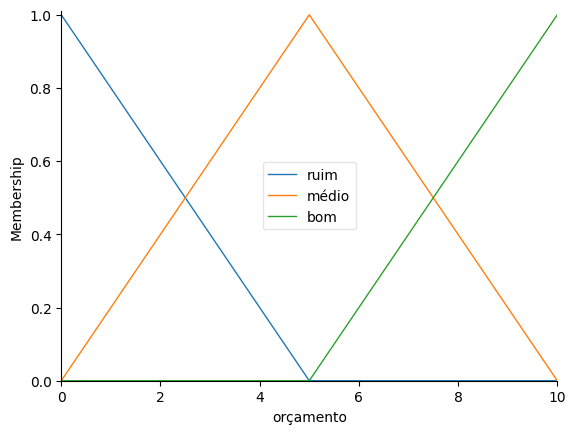

In [ ]:
#Mostrar grafico construido
orcamento.view()

In [ ]:
#Criamos um grafico para número de funcionários
num_funcionarios.automf(number=3,names=['baixo','suficiente','alto'])

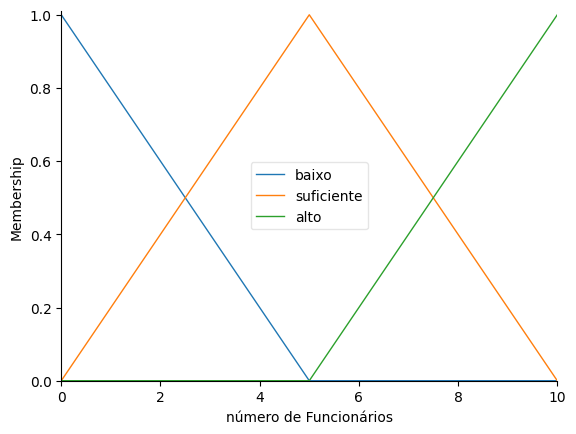

In [ ]:
num_funcionarios.view()

In [ ]:
#definicao da funçao risco manualmente
# Triangulo tem 3 vertices
nivel_risco['Adequado']=fuzz.trimf(nivel_risco.universe,[0,0,3])
nivel_risco['Moderado']=fuzz.trimf(nivel_risco.universe,[2,5,7])
nivel_risco['Arriscado']=fuzz.trimf(nivel_risco.universe,[6,10,10])

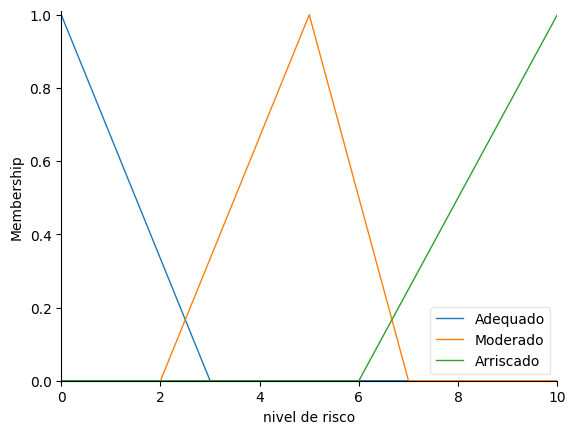

In [ ]:
nivel_risco.view()

In [ ]:
#se orçamento bom então nivel de risco: adequado
regra1 = ctrl.Rule(orcamento['bom'] & num_funcionarios['baixo'], nivel_risco['Adequado'])
#se orçamento ruim e número de funcionário baixo então nivel de risco: Arriscado
regra2 = ctrl.Rule(orcamento['ruim'] & num_funcionarios['baixo'], nivel_risco['Arriscado'])
#se orçamento ruim e número de funcionário suficiente então nivel de risco: Arriscado
regra3=ctrl.Rule(orcamento['ruim'] & num_funcionarios['suficiente'], nivel_risco['Arriscado'])
#se orçamento médio e número de funcionários suficiente então nivel de risco: moderado
regra4=ctrl.Rule(orcamento['médio'] & num_funcionarios['suficiente'], nivel_risco['Moderado'])


# Sistema de Controle

In [ ]:
#Aplicar as regras e fazendo defuzzyficação
sistema_controle=ctrl.ControlSystem([regra1,regra2,regra3,regra4])

In [ ]:
#Sistema de simulação: criamos um simulador
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['orçamento'] = 0
sistema.input['número de Funcionários'] = 0
sistema.compute()

In [ ]:
print(sistema.output['nivel de risco'])

8.666666666666668


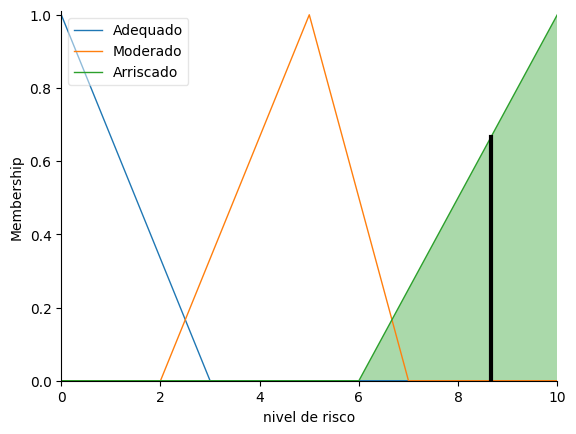

In [ ]:
nivel_risco.view(sim = sistema)